In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

# Principal stress directions in FPS

The corresponding tensile stress at this position which must be perpendicular to the crack propagation 
\begin{align}
\sigma^{fps}_3 = f_t
\end{align}

The stresses in the global co-ordinates are expressed as:
\begin{align}
\sigma_{xz} = 
\left[
\begin{array}{cc}
\sigma_{xx} & \tau_{xz} \\
\tau_{zx} & \sigma_{zz}
\end{array}
\right] =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{fps} \\
\tau^\mathrm{fps} & \sigma_{z}
\end{array}
\right]
\end{align}

In our case $\sigma_z = 0$ as the specimen is uniaxially loaded therefore, the stress will be depicted as follows:
The stresses in the global co-ordinates are expressed as:
\begin{align}
\sigma_{xz} = 
\left[
\begin{array}{cc}
\sigma_{xx} & \tau_{xz} \\
\tau_{zx} & 0
\end{array}
\right] =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{fps} \\
\tau^\mathrm{fps} & 0
\end{array}
\right]
\end{align} 
$\sigma_x, \tau_{fps}, \sigma_z$ represents the stress in x-direction, shear stress in fracture process segment and stress in vertical direction respectively.

<img src="farfieldstress.png" width="500"/>

In [ ]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
tau_fps

In [ ]:
sigma_xz = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, 0]])
#sigma_x0 = sigma_xz.subs(sigma_z,0)
sigma_xz#, sigma_x0

In [ ]:
P_xz, D_xz = sigma_xz.diagonalize()
P_xz, D_xz

In [ ]:
sp.simplify(P_xz* D_xz * P_xz**(-1))

## Representation of Far field stress in terms of Stress Intensity factors
In this implementation, the far field stress is represented in  terms of Stress Intensity factors (SIFs) where $K_I$ represents mode I and $K_{II}$ depicts mode II. This terminology of measuring stresses in SIFs for external stress acting in uniaxial direction is shown as:
\begin{gather*}
K_I = \sigma_x \sqrt{\pi a}\sin^2 \beta  \\
K_{II} = \sigma_x \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}
The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. $\beta$ represents the angle of crack orientation with respect to the vertical direction and $a$ represents the length of crack as depicted in figure. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [6]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

In [7]:
K_I = sigma_x * sp.sqrt(sp.pi * a) * s_b**2
K_II  = sigma_x * sp.sqrt(sp.pi * a) * c_b * s_b
K_I, K_II

In [8]:
params = {beta:45*np.pi/180}

In [9]:
K_I_ = K_I#.subs(params)
K_II_ = K_II#.subs(params)
K_I_, K_II_

Conversion of the Stress Intensity factors into stress field. Hence, the Stress field in the cartesian coordinates wil be given as:
\begin{align}
\sigma_b =
\left[
\begin{array}{cc}
K_I & K_{II} \\
K_{II} & 0
\end{array}
\right] 
\end{align}
The last term of the above matrix is taken as 0 to consider the stress along z-axis to be zero.

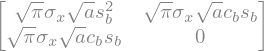

In [10]:
Sigma_b = sp.Matrix([[K_I, K_II],[K_II, 0]])
Sigma_b 

## Transformation of the Stress Function
In this part the stress matrix given above is transformed into the polar coordinates by following the steps given below:
\begin{align}
T_t = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma_{tb} = T_t^T \sigma_b T_t 
\end{align}

In [11]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [12]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

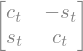

In [19]:
T_t = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
T_t

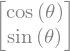

In [20]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

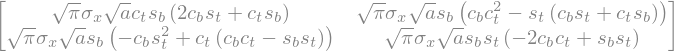

In [21]:
Sigma_tb = T_t.T * Sigma_b * T_t
Sig = sp.simplify(Sigma_tb)
Sig

In [22]:
Sigma_tb[1,1]

In [23]:
#dsigma_d_ct = Sigma_tb.diff(T_t[0,0])
#dsigma_d_cs = dsigma_d_ct.diff(T_t[1,0])
#dsigma_d_cs_ = sp.simplify(dsigma_d_cs)
#dsigma_d_cs_

In [24]:
#dsigma_d_cs_[1,1]

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, the angle will be calculated as:
\begin{gather*}
\frac{\partial{\sigma_{\theta \theta}}}{\partial{\theta}} = 0
\end{gather*}

In [25]:
dsigma_d_cs_val = Sigma_tb[1,1].subs(c_t, cs_theta_[0]).subs(s_t, cs_theta_[1])
dsigma_d_cs_val

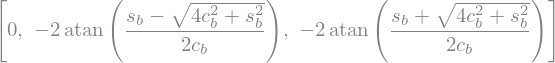

In [26]:
theta_ = sp.solve(dsigma_d_cs_val, theta)
theta_

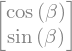

In [27]:
cs_beta_ = sp.Matrix([sp.cos(beta), sp.sin(beta)])
cs_beta_

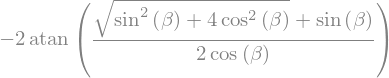

In [28]:
theta_val = theta_[2].subs(c_b, cs_beta_[0]).subs(s_b, cs_beta_[1])
theta_val

In [29]:
get_theta = sp.lambdify((beta), theta_val, 'numpy')
get_theta

<function _lambdifygenerated(Dummy_207)>

<IPython.core.display.Javascript object>


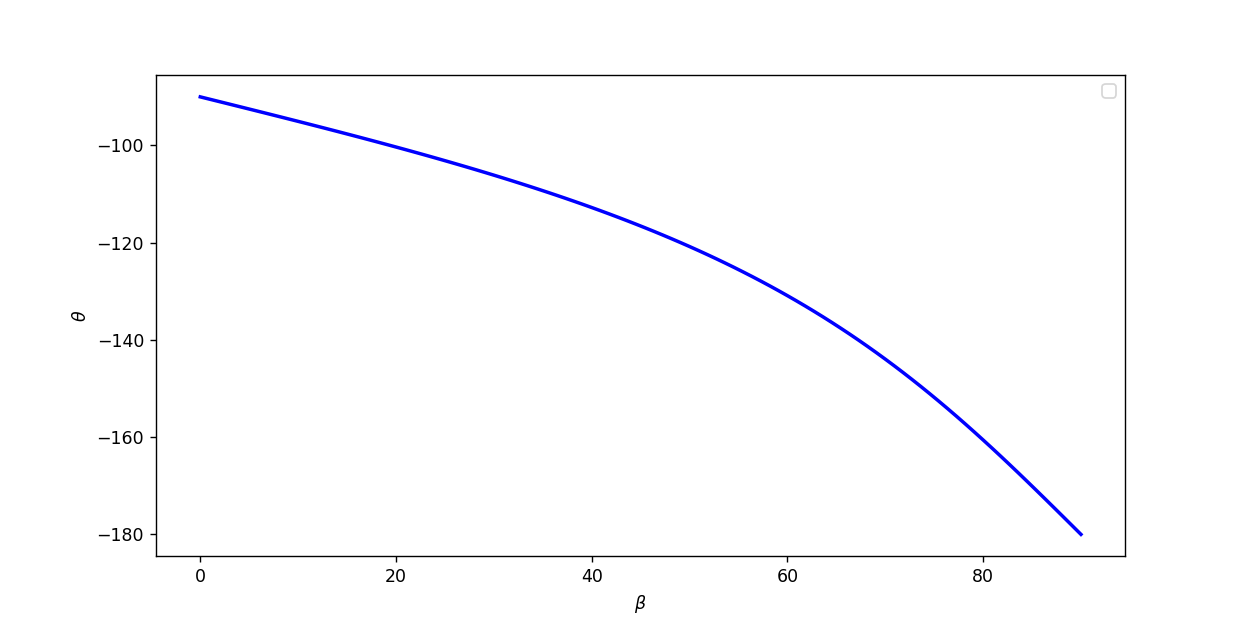

No handles with labels found to put in legend.


In [30]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
beta = np.linspace(0, 90 * np.pi/180, 100)
theta = get_theta(beta) 
ax1.plot(beta * 180/np.pi, theta * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()

In [32]:
theta * 180/np.pi

array([ -90.        ,  -90.45457406,  -90.90931983,  -91.36440922,
        -91.82001457,  -92.2763089 ,  -92.73346607,  -93.19166104,
        -93.65107008,  -94.111871  ,  -94.57424338,  -95.03836877,
        -95.50443099,  -95.97261631,  -96.44311371,  -96.91611514,
        -97.39181576,  -97.87041424,  -98.35211296,  -98.83711834,
        -99.32564109,  -99.81789652, -100.31410482, -100.81449137,
       -101.31928706, -101.82872862, -102.34305891, -102.86252733,
       -103.38739009, -103.91791066, -104.45436008, -104.99701736,
       -105.54616987, -106.10211375, -106.66515433, -107.23560652,
       -107.81379528, -108.40005601, -108.99473504, -109.59819005,
       -110.21079056, -110.83291831, -111.46496781, -112.1073467 ,
       -112.76047627, -113.42479185, -114.1007432 , -114.78879497,
       -115.48942702, -116.20313478, -116.93042947, -117.67183844,
       -118.42790524, -119.19918976, -119.98626822, -120.78973303,
       -121.6101926 , -122.44827093, -123.30460703, -124.17985

In [33]:
beta * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72